In [39]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

standard_flag = True
PCA_d = 3

train_xlsx = '训练集3-1.xlsx'
test_xlsx = '验证集1.xlsx'

# 训练

In [40]:
train_data = pd.read_excel(train_xlsx, header=None)
train_features = train_data.iloc[:, :8].values
train_labels = train_data.iloc[:, 8].values

# 数据标准化
if standard_flag:
    scaler = StandardScaler()
    train_features = scaler.fit_transform(train_features)
    train_features

train_features

array([[ 1.66437611e-02, -2.65409735e-01, -2.16984926e-01,
        -3.60472847e-01, -2.11891227e-01, -3.55755290e-01,
        -1.59402538e-01, -3.08170072e-01],
       [-1.04920554e-01, -3.15784931e-01, -1.92464310e-01,
        -3.30947966e-01, -3.14385011e-01, -3.84015726e-01,
        -3.57013541e-01, -4.08610461e-01],
       [-2.16368755e-01, -3.36479621e-01, -2.81243536e-01,
        -3.78477671e-01, -7.64550365e-02, -3.06308310e-01,
        -1.55865876e-01, -3.35521289e-01],
       [-1.93090812e-01, -3.37761378e-01, -3.13934895e-01,
        -3.55286011e-01, -3.19977936e-01, -3.81702095e-01,
        -2.14157648e-01, -3.53716836e-01],
       [-1.91948670e-01, -3.13519773e-01, -8.64543805e-02,
        -3.08333163e-01, -1.64835656e-01, -3.30668361e-01,
        -1.84574942e-01, -3.27171677e-01],
       [-1.90014021e-01, -3.13700950e-01, -8.80147071e-02,
        -3.07783192e-01, -1.63929133e-01, -3.30299484e-01,
        -1.87369537e-01, -3.26993949e-01],
       [-1.88568862e-01, -3.101612

In [41]:
from sklearn.decomposition import PCA
# PCA降维
# 进行PCA降维
pca = PCA(n_components=PCA_d)  # 设置降维后的维度为2
features_pca = pca.fit_transform(train_features)
features_pca

array([[-6.58651831e-01,  7.49537220e-02, -3.13108827e-01],
       [-8.51761554e-01,  1.56712402e-01, -1.65454021e-01],
       [-7.37896875e-01, -1.37614106e-01, -1.88806968e-01],
       [-8.73367272e-01,  2.10801985e-02, -1.71672132e-01],
       [-6.74409960e-01,  1.67405584e-03, -1.52743653e-01],
       [-6.74624109e-01,  2.35099097e-03, -1.52704486e-01],
       [-6.72913736e-01,  5.00235158e-03, -1.52803662e-01],
       [-6.67134847e-01,  5.28906992e-03, -1.50270579e-01],
       [-6.68126480e-01,  3.31269521e-03, -1.55592942e-01],
       [-7.12473057e-01, -1.10206355e-01, -1.59579104e-01],
       [-7.22909980e-01, -6.99616398e-02, -1.72102528e-01],
       [-7.14894661e-01,  2.10455877e-02, -1.35023404e-01],
       [-2.53229582e-01, -1.21820658e-01, -1.03918489e-01],
       [-1.27508584e-01,  1.33387993e-02, -1.91442349e-01],
       [-2.46605390e-01,  9.08254152e-03, -1.49241352e-01],
       [-4.18033285e-01, -6.39166174e-02, -5.35888741e-02],
       [-8.52229085e-01, -3.94502666e-02

In [42]:
# 创建KNN分类器
k = PCA_d  # 降维后为2分类
knn = KNeighborsClassifier(n_neighbors=k, weights='distance')

# 训练
knn.fit(features_pca, train_labels)

KNeighborsClassifier(n_neighbors=3, weights='distance')

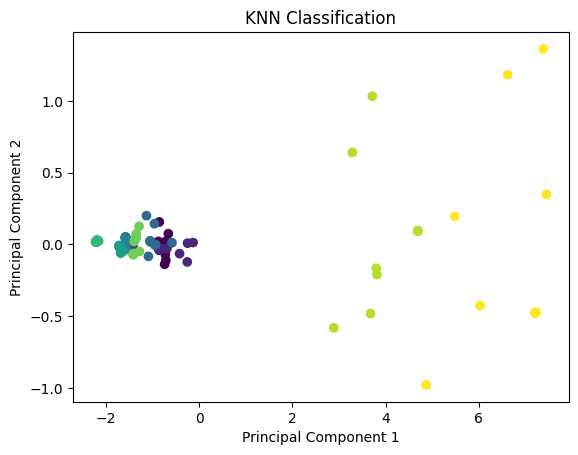

In [43]:
# PCA降维后的KNN分类可视化
predicted_labels = knn.predict(features_pca)

plt.scatter(features_pca[:, 0], features_pca[:, 1], c=predicted_labels, cmap='viridis')
plt.title('KNN Classification')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# 测试

In [44]:
# 测试
test_data = pd.read_excel(test_xlsx, header=None)

test_features = test_data.iloc[:, :8].values
test_labels = test_data.iloc[:, 8].values
test_labels

array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9],
      dtype=int64)

In [45]:
# 标准化
if standard_flag:
    test_features = scaler.transform(test_features)

In [46]:
from sklearn.decomposition import PCA
# PCA降维
# 进行PCA降维
pca = PCA(n_components=PCA_d)  # 设置降维后的维度为2
test_features_pca = pca.fit_transform(test_features)
test_features_pca

array([[-6.19776716e-01,  8.31026200e-02, -2.77557187e-01],
       [-7.50137934e-01,  4.24270022e-02, -2.50724651e-01],
       [-7.35314732e-01, -1.61973408e-02, -2.32777476e-01],
       [-7.79052097e-01, -3.90391174e-02, -2.68176145e-01],
       [-1.68184349e+00,  4.37409219e-02,  1.16603741e-01],
       [-1.47612327e+00, -6.42320283e-02, -2.41437279e-02],
       [-1.09596928e+00,  4.75914586e-02, -1.82758045e-01],
       [-1.00099582e+00,  2.01795971e-02, -1.90109539e-01],
       [-1.68730194e+00,  3.99815982e-02,  4.12714951e-02],
       [-1.66102700e+00,  2.37496331e-03,  1.88373014e-02],
       [-1.83956213e+00, -7.55931563e-03,  1.25458516e-01],
       [-1.86446390e+00,  7.05948596e-03,  1.35111281e-01],
       [-2.28401470e+00,  1.66698454e-02,  3.10541650e-01],
       [-2.29554610e+00,  1.91011588e-02,  3.23968405e-01],
       [-1.50532516e+00,  2.64844113e-02,  1.17593658e-02],
       [-1.49335357e+00,  8.62995889e-02,  3.10767928e-02],
       [ 4.25249394e+00, -2.54277341e-01

In [47]:
predicted_labels = knn.predict(test_features_pca)
predicted_labels

array([0, 0, 0, 0, 5, 7, 3, 3, 5, 4, 5, 5, 6, 6, 2, 2, 8, 8, 9, 9],
      dtype=int64)

In [48]:
predicted_scores = knn.predict_proba(test_features_pca)
predicted_scores

array([[0.49765775, 0.18054068, 0.        , 0.32180157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.62747444, 0.37252556, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.52420301, 0.47579699, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.62635948, 0.37364052, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.33208922, 0.        , 0.        ,
        0.        , 0.        , 0.66791078, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [49]:
correct = (predicted_labels == test_labels).sum().item()
total = len(test_data)
accuracy = correct / total
print(f"Accuracy: {accuracy * 100}%")

Accuracy: 65.0%


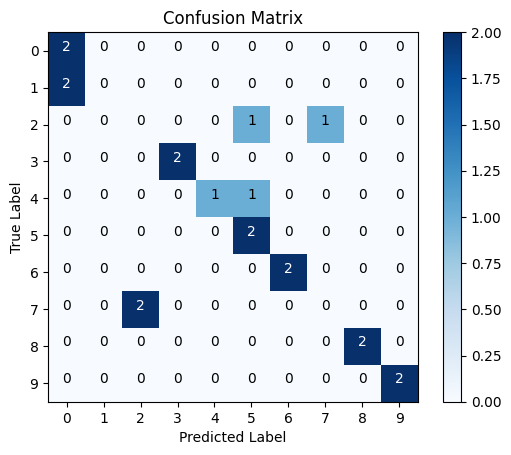

In [50]:
from sklearn.metrics import confusion_matrix

# 计算混淆矩阵
cm = confusion_matrix(test_labels, predicted_labels)

plt.imshow(cm, cmap='Blues')
plt.colorbar()
classes = ['0', '1', '2', '3', '4', '5', '6', '7','8','9']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [51]:
import numpy as np
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

# 计算分类报告
report = classification_report(test_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00         2
           4       1.00      0.50      0.67         2
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         2
           7       0.00      0.00      0.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2

    accuracy                           0.65        20
   macro avg       0.60      0.65      0.60        20
weighted avg       0.60      0.65      0.60        20

